In [31]:
import numpy as np
import pandas as pd

# Importar os dados
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
print(f"Base de dados com {len(df)} linhas")

Base de dados com 150 linhas


In [32]:
# Alterando dados categóricos para numéricos
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)
df['variety']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [33]:
# Principio do Aprendizado de Maquina Supervisionado
data = df.drop('variety', axis=1) # Dados
labels = df['variety'] # Labels

In [34]:
# Convertendo para array
data = data.values
labels = labels.values

In [35]:
# Dividindo dados para o processo de treino, teste e validação
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=41)
print(f'Quantidade de Dados para Treinamento : {len(data_train)}')
print(f'Quantidade de Dados para Teste : {len(data_test)}')

Quantidade de Dados para Treinamento : 120
Quantidade de Dados para Teste : 30


In [36]:
import torch
data_train = torch.FloatTensor(data_train)
data_test = torch.FloatTensor(data_test)
labels_train = torch.LongTensor(labels_train)
labels_test = torch.LongTensor(labels_test)

In [37]:
# Importação das Bibliotecas 
import torch.nn as nn

# Criação do Modelo de Rede
    # 4 Entradas (4 Caracteristicas da Flor)
    # 2 Camadas de Neuronio
    # 3 Saidas (3 Rotulos de Flor)
class IrisClassifier(nn.Module) :
    def __init__(self, input_size = 4, hidden_size1=128, hidden_size2 = 64, output_size = 3) :
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, data) :
        data = self.relu(self.fc1(data))
        data = self.relu(self.fc2(data))
        data = self.output(data)
        return data


In [38]:
classificadorMonstro = IrisClassifier() 

In [39]:
# Otimizador e Função de calculo de erro
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classificadorMonstro.parameters(), lr=learning_rate)

In [40]:
def train_network(model, optimizer, criterion, data_train, labels_train, data_test, labels_test, num_epochs, train_losses, test_losses) :
    for i in range(num_epochs) :
        optimizer.zero_grad()

        label_train = model.forward(data_train) # Pegando a previsão
        loss_train = criterion(label_train, labels_train)
        loss_train.backward()
        optimizer.step()
        
        label_test = model(data_test)
        loss_test = criterion(label_test, labels_test)
        
        train_losses.append(loss_train.detach().numpy())
        test_losses.append(loss_test.detach().numpy())

        if i%5 == 0 :
            print(f'Época {i}, Erro de Treinamento : {loss_train}, Erro de Validação : {loss_test}')


In [41]:
num_epochs = 25
train_losses = []
test_losses = []

In [42]:
train_network(classificadorMonstro, optimizer, criterion, data_train, labels_train, data_test, labels_test, num_epochs, train_losses, test_losses)

Época 0, Erro de Treinamento : 1.1395002603530884, Erro de Validação : 1.5862339735031128
Época 5, Erro de Treinamento : 0.7067789435386658, Erro de Validação : 0.6514652371406555
Época 10, Erro de Treinamento : 0.4028768539428711, Erro de Validação : 0.40664052963256836
Época 15, Erro de Treinamento : 0.23821355402469635, Erro de Validação : 0.2553582191467285
Época 20, Erro de Treinamento : 0.11785011738538742, Erro de Validação : 0.16148337721824646


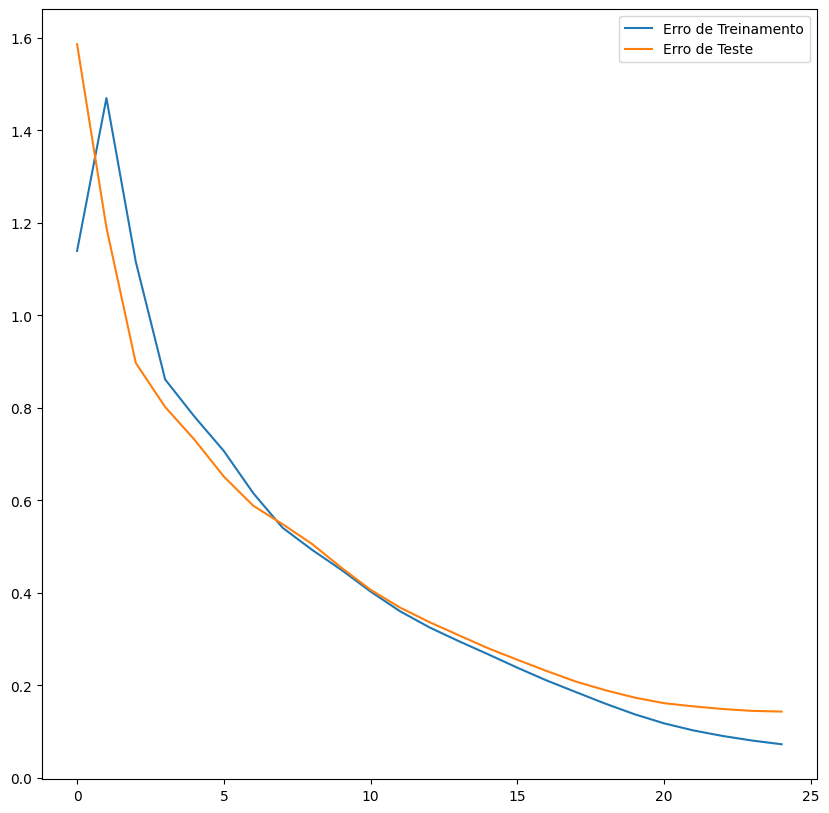

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(train_losses, label='Erro de Treinamento')
plt.plot(test_losses, label='Erro de Teste')
plt.legend()
plt.show()

In [44]:
# Teste próprio

import operator
data_testp = torch.FloatTensor(data_test[0])
label_testp = torch.LongTensor(labels_test[0])
output = classificadorMonstro(data_testp)

logits = torch.nn.functional.softmax(output, dim=-1) * 100
categories = ['Setosa','Versicolor', 'Virginica']
prob_dict = {}

for i, classname in enumerate(categories):
  prob = logits[i]
  prob_dict[classname] = [prob]

result = max(prob_dict.items(), key=operator.itemgetter(1))
print(f'Resultado Calculado : {result[0]}')
print(f'Resultado Esperado : {categories[label_testp]}')



Resultado Calculado : Virginica
Resultado Esperado : Virginica


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [47]:
class_predict_onehot = classificadorMonstro(data_test)
class_predict = class_predict_onehot.argmax(axis=1)
confusion_matriz = confusion_matrix(labels_test, class_predict, labels=range(3))
print("----- Matriz de Confusão - Dados de Teste -----")
confusion_matriz

----- Matriz de Confusão - Dados de Teste -----


array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]], dtype=int64)

In [48]:
precision = precision_score(labels_test, class_predict, average='weighted', zero_division=1)
recall_score = recall_score(labels_test, class_predict, average='weighted', zero_division=1)
f1_score = f1_score(labels_test, class_predict, average='weighted', zero_division=1)
accuracy_score = accuracy_score(labels_test, class_predict)

print("-----Métricas no Geral------")
print("Precisão : ", precision)
print("Revocação : ",  recall_score)
print("F1 - Score: ", f1_score)
print("Acurácia : ", accuracy_score)

-----Métricas no Geral------
Precisão :  0.9696969696969696
Revocação :  0.9666666666666667
F1 - Score:  0.9666666666666667
Acurácia :  0.9666666666666667


In [49]:
precision, recall_score, f1_score, support = precision_recall_fscore_support(labels_test, class_predict, zero_division=1)

print("-------Métricas para cada classe-------")
confusion_matriz = confusion_matriz.astype('float') / confusion_matriz.sum(axis=1)[:, np.newaxis]
accuracy_score = confusion_matriz.diagonal()


print("Acurácia : ", accuracy_score)

print(classification_report(labels_test, class_predict, zero_division=1))

-------Métricas para cada classe-------
Acurácia :  [1.         0.90909091 1.        ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

